In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (15, 3)

# Combining dataframes and scraping Canadian weather data

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV. 

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

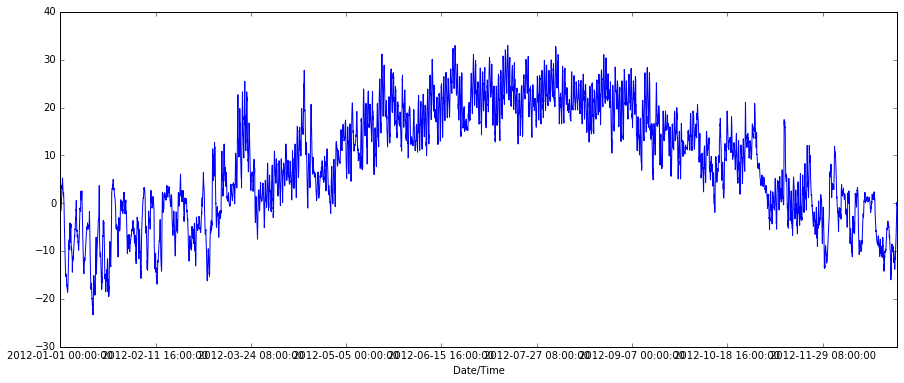

In [2]:
weather_2012_final = pd.read_csv('../data/weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

# 5.1 Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for [Canadian historical weather data](http://climate.weather.gc.ca/index_e.html#access), and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

Here's an URL template you can use to get data in Montreal. 

In [12]:
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1"
# url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?timeframe=1&Year={year}&Month={month}&StationID=5415&format=csv"


To get the data for March 2013, we need to format it with `month=3, year=2012`.

In [40]:
url = url_template.format(month=3, year=2012)

try:
    weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1', header=True)
except:
    weather_mar2012 = pd.read_csv('../data/weather_2012.csv', parse_dates=True)

This is super great! We can just use the same `read_csv` function as before, and just give it a URL as a filename. Awesome.

There are 16 rows of metadata at the top of this CSV, but pandas knows CSVs are weird, so there's a `skiprows` options. We parse the dates again, and set 'Date/Time' to be the index column. Here's the resulting dataframe.

In [41]:
weather_mar2012

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [47]:
weather_mar2012.set_index('Date/Time', inplace=True)
weather_mar2012.index = pd.to_datetime(weather_mar2012.index)
weather_mar2012

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


Let's plot it!

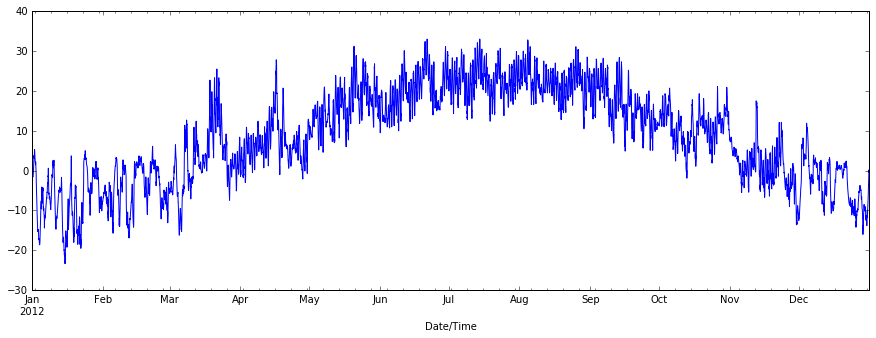

In [48]:
weather_mar2012[u"Temp (C)"].plot(figsize=(15, 5))

Notice how it goes up to 25° C in the middle there? That was a big deal. It was March, and people were wearing shorts outside. 

# 2.3 Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

In [50]:
temperatures = weather_mar2012[[u'Temp (C)']].copy()
print(temperatures.head)
temperatures.loc[:,'Hour'] = weather_mar2012.index.hour

<bound method DataFrame.head of                      Temp (C)
Date/Time                    
2012-01-01 00:00:00      -1.8
2012-01-01 01:00:00      -1.8
2012-01-01 02:00:00      -1.8
2012-01-01 03:00:00      -1.5
2012-01-01 04:00:00      -1.5
2012-01-01 05:00:00      -1.4
2012-01-01 06:00:00      -1.5
2012-01-01 07:00:00      -1.4
2012-01-01 08:00:00      -1.4
2012-01-01 09:00:00      -1.3
2012-01-01 10:00:00      -1.0
2012-01-01 11:00:00      -0.5
2012-01-01 12:00:00      -0.2
2012-01-01 13:00:00       0.2
2012-01-01 14:00:00       0.8
2012-01-01 15:00:00       1.8
2012-01-01 16:00:00       2.6
2012-01-01 17:00:00       3.0
2012-01-01 18:00:00       3.8
2012-01-01 19:00:00       3.1
2012-01-01 20:00:00       3.2
2012-01-01 21:00:00       4.0
2012-01-01 22:00:00       4.4
2012-01-01 23:00:00       5.3
2012-01-02 00:00:00       5.2
2012-01-02 01:00:00       4.6
2012-01-02 02:00:00       3.9
2012-01-02 03:00:00       3.7
2012-01-02 04:00:00       2.9
2012-01-02 05:00:00       2.6
...     

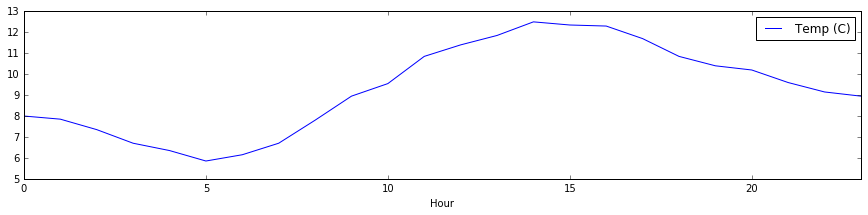

In [51]:
temperatures.groupby('Hour').aggregate(np.median).plot()

So it looks like the time with the highest median temperature is 2pm. Neat.

# 5.4 Saving to a CSV

It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!

In [15]:
weather_2012.to_csv('../data/weather_2012_new.csv')

And we're done!